In [2]:
import pandas as pd
from datetime import datetime

df = pd.read_csv('C:\\Users\\pedro\Downloads\\material+curso+-+Time+Series\\material curso - Time Series\\alucar.csv')

<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:4: SyntaxWarning: invalid escape sequence '\D'
C:\Users\pedro\AppData\Local\Temp\ipykernel_6456\3026988544.py:4: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv('C:\\Users\\pedro\Downloads\\material+curso+-+Time+Series\\material curso - Time Series\\alucar.csv')


In [3]:
df.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


Exibindo a quantidade de linhas e colunas

In [4]:
print("Exibindo a quantidade de linhas e de colunas: ", df.shape)

Exibindo a quantidade de linhas e de colunas:  (24, 2)


Verificando os tipos de dados de cada coluna - Isso é importante, principalmente na coluna de datas, pois ela deve ser do tipo Datetime

In [ ]:
df.dtypes 

mes       object
vendas     int64
dtype: object

Acima, pode-se ver que o mes tá como Object

In [6]:
df['mes'] = pd.to_datetime(df['mes'])
df.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

Visualisando como que está a série temporal, após fazer a conversão de tipo da coluna de data

In [7]:
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

Visualizando a evolução da série temporal

In [8]:
def plot(x, y, df, titulo, xlabel, ylabel):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x, y=y, data=df)
    ax.figure.set_size_inches(12, 6)
    ax.set_title(titulo, loc='left', fontsize=18)
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax = ax

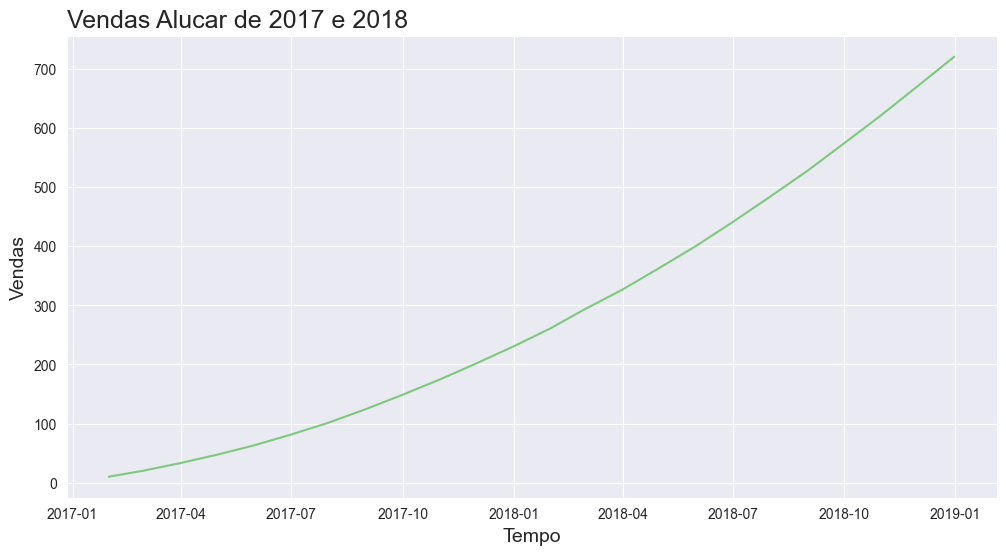

In [9]:
plot('mes', 'vendas', df, 'Vendas Alucar de 2017 e 2018', 'Tempo', 'Vendas')

Agora vou observar o aumento que cada mês teve, em relação ao periodo anterior, e para fazer isso, basta subtarir o valor das vendas de um mês pelo seu anterior

In [10]:
df['aumento'] = df['vendas'].diff()
df.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


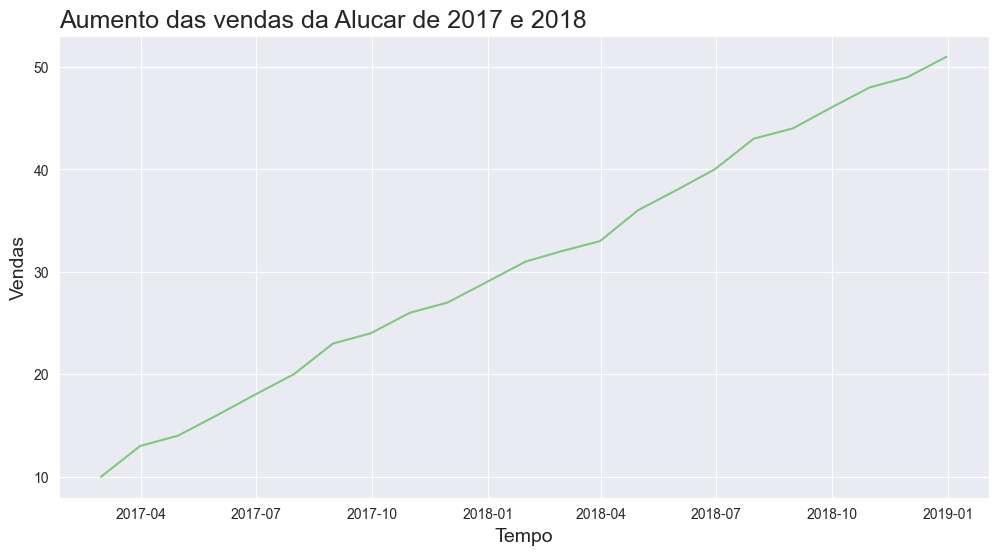

In [11]:
plot('mes', 'aumento', df, 'Aumento das vendas da Alucar de 2017 e 2018', 'Tempo', 'Vendas')

Descobrindo a aceleração das vendas - Caso o valor seja positivo as vendas estão crescendo rapidamente, caso sejam negativas, estão crescendo devagar

In [12]:
df['aceleracao'] = df['aumento'].diff()
df.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


Esse gráfico mostra se o ritmo das vendas aumentaram ou diminuiram

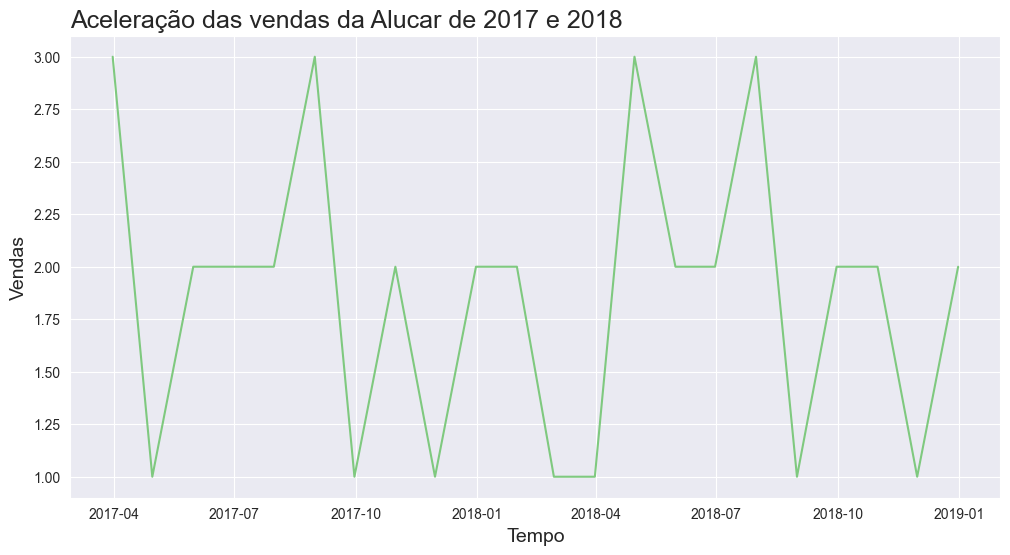

In [13]:
plot('mes', 'aceleracao', df, 'Aceleração das vendas da Alucar de 2017 e 2018', 'Tempo', 'Vendas')

Exibindo os 3 gráficos no mesmo plot

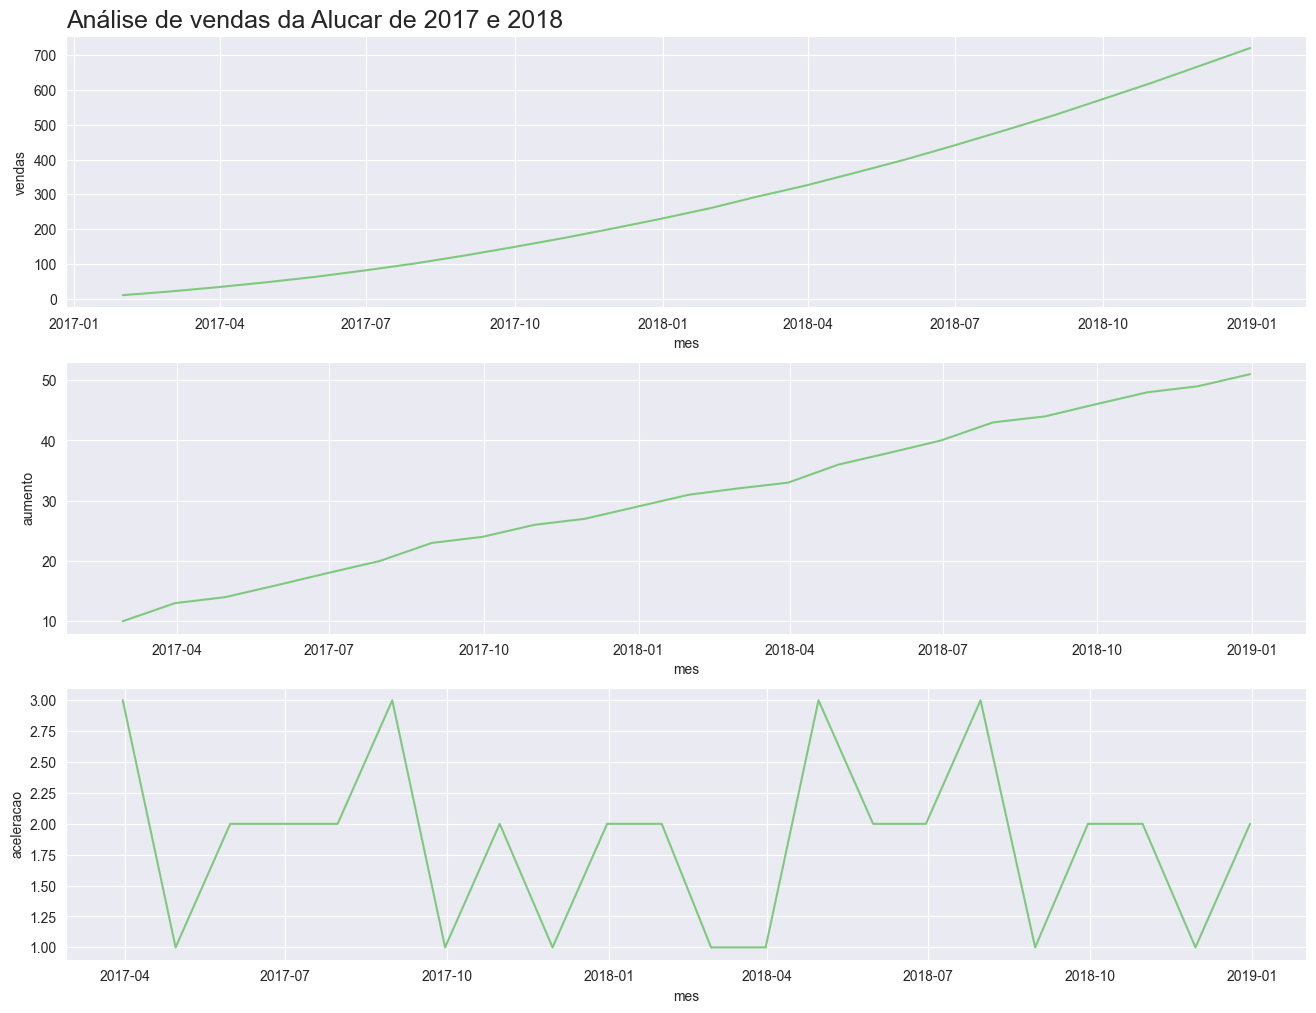

In [14]:
plt.figure(figsize=(16, 12))
ax = plt.subplot(3,1,1)
ax.set_title('Análise de vendas da Alucar de 2017 e 2018', fontsize=18, loc='left')
sns.lineplot(x='mes', y='vendas', data=df)
plt.subplot(3,1,2)
sns.lineplot(x='mes', y='aumento', data=df)
plt.subplot(3,1,3)
sns.lineplot(x='mes', y='aceleracao', data=df)
ax=ax


Visualização de autocorrelação 

A autocorrelação com lag 7 compara o valor de hoje com o de 7 dias atrás.

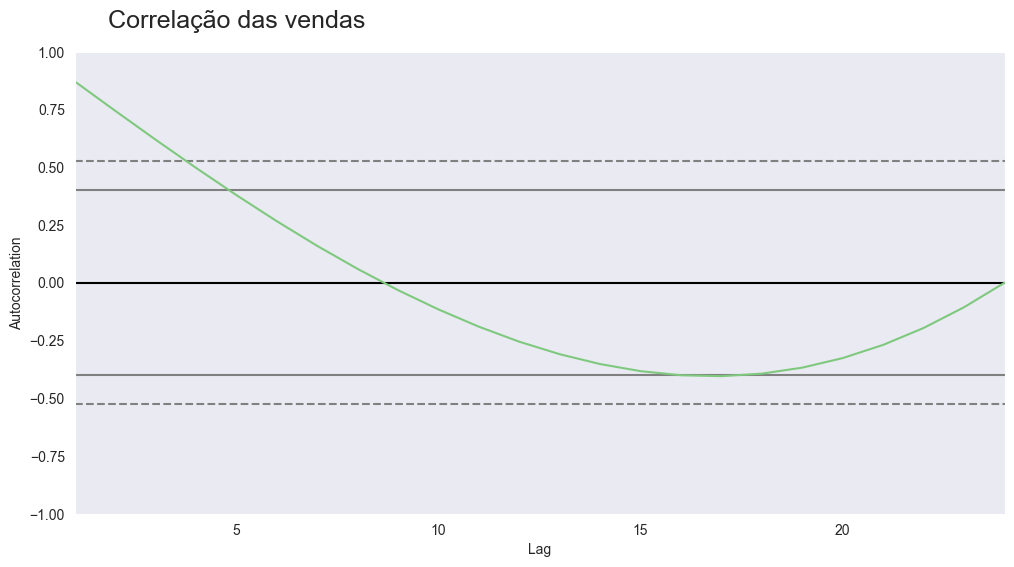

In [15]:
from pandas.plotting import autocorrelation_plot

ax = plt.figure(figsize=(12, 6))
ax.suptitle('Correlação das vendas', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(df['vendas'])
ax = ax